# Lending Club Case Study


#### Objective : The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [450]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [451]:
Loan = pd.read_csv("loan.csv")

C:\Users\Priyanka harkar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 1:Data Cleaning 


In [452]:
### Selecting only the required columns from the entire dataset

Loan = Loan[['loan_amnt','term', 'int_rate', 'installment','grade','sub_grade','emp_length','home_ownership',
'annual_inc','verification_status','issue_d','loan_status','desc','purpose','dti']]
Loan = Loan.dropna()
Loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,dti
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,27.65
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,1.00
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,20.00
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,17.94
6,7000,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,23.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39708,5000,36 months,9.96%,161.25,B,B5,4 years,MORTGAGE,48000.0,Not Verified,Jul-07,Fully Paid,I would like to pay off my high-interest credi...,debt_consolidation,8.03
39711,5000,36 months,8.70%,158.30,B,B1,5 years,MORTGAGE,75000.0,Not Verified,Jul-07,Fully Paid,I'd like to shift some credit card debt so it ...,credit_card,15.55
39712,2500,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,Our current gutter system on our home is old a...,home_improvement,11.33
39713,8500,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,The rate of interest and fees incurred by carr...,credit_card,6.40


In [453]:
## dropping null values
#Making the function that will help us in cleaning data

Loan['emp_length'] = Loan['emp_length'].astype(str)
Loan['emp_length'] = Loan['emp_length'].str.rstrip('years ')
Loan['emp_length'].replace({'10+': '10'}, inplace=True)
Loan['emp_length'][Loan['emp_length'] == '< 1'] = '0.5'
Loan['int_rate'] = Loan['int_rate'].str.rstrip('%')

# convert amount columns into numeric data 

cols1 = ['loan_amnt','int_rate','installment','annual_inc','dti','emp_length']
Loan[cols1] = Loan[cols1].apply(pd.to_numeric)


<ipython-input-453-68129d000011>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan['emp_length'][Loan['emp_length'] == '< 1'] = '0.5'


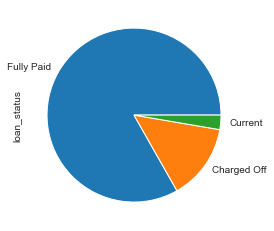

In [454]:
# plotting pie chart for different types of loan_status

Loan['loan_status'].value_counts().plot(kind='pie')


### Removing Outliers

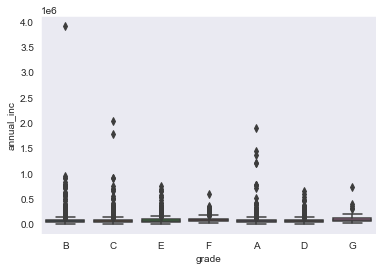

In [455]:

sns.boxplot(x='grade',y='annual_inc',data=Loan)

In [456]:
Loan['annual_inc'].describe()

count    2.614700e+04
mean     6.956147e+04
std      5.916066e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.320284e+04
max      3.900000e+06
Name: annual_inc, dtype: float64

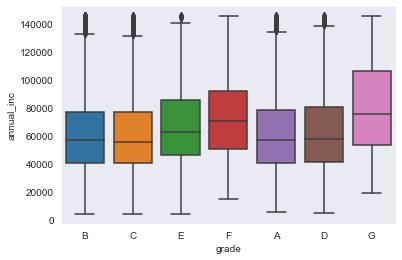

In [457]:
## Removing Outliers

Q3 = np.quantile(Loan.annual_inc,0.75)
Q1 = np.quantile(Loan.annual_inc, 0.25)
x = Q3-Q1

IQR = Q3 + 1.5 * x
Loan = Loan[Loan['annual_inc']<IQR]

sns.boxplot(Loan.grade, Loan.annual_inc)


In [458]:
# categorise dti into buckets
Loan['dti_cats'] = pd.cut(Loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

<ipython-input-458-6320854cd893>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan['dti_cats'] = pd.cut(Loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])


## 2: Data Visualization

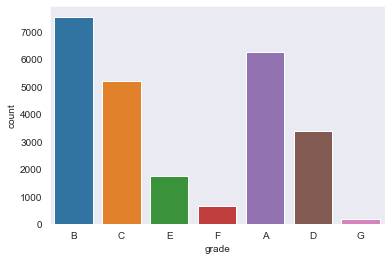

In [459]:
sns.countplot(x='grade', data=Loan)
plt.show()

#### Grade A & B have most of the loans

In [460]:
### Excuding loan_status which is Current as we don't know if those applicants will be defaulted or not as they are paying the EMIs

Loan = Loan[Loan['loan_status']!="Current"]

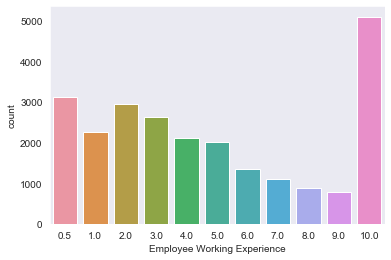

In [461]:
sns.countplot(x='emp_length', data=Loan)
plt.xlabel('Employee Working Experience')
plt.show()

#### Most of the loan applicants are having employee exp of 10+ years

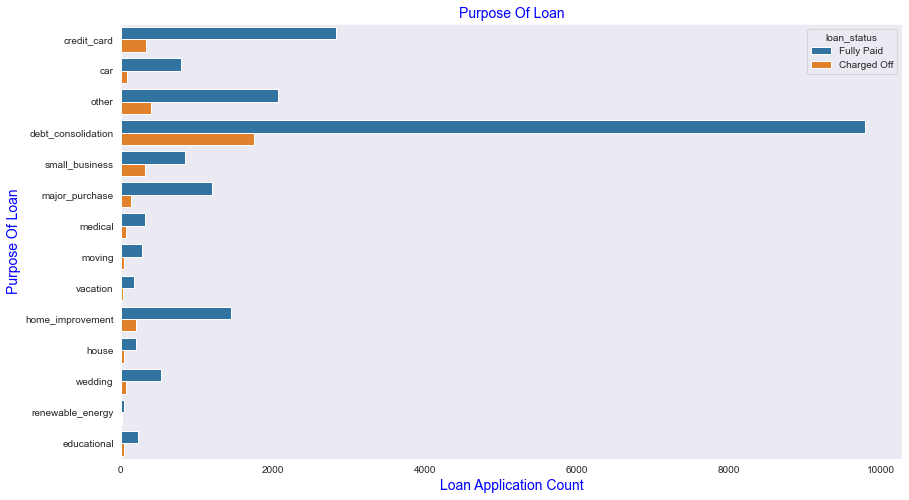

In [462]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='w')

ax = sns.countplot(y="purpose",data=Loan,hue='loan_status')
ax.set_title('Purpose Of Loan',fontsize=14,color='b')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()


###  To check if term affects the loan status of a person

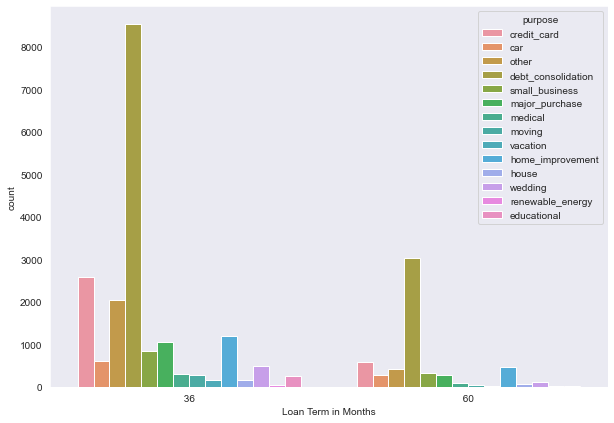

In [463]:
Loan['term_months'] = Loan['term'].str.rstrip('months')

plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=Loan)
plt.xlabel('Loan Term in Months')
plt.show()

#### Tenure of 36 months have have high chances to be defaulters

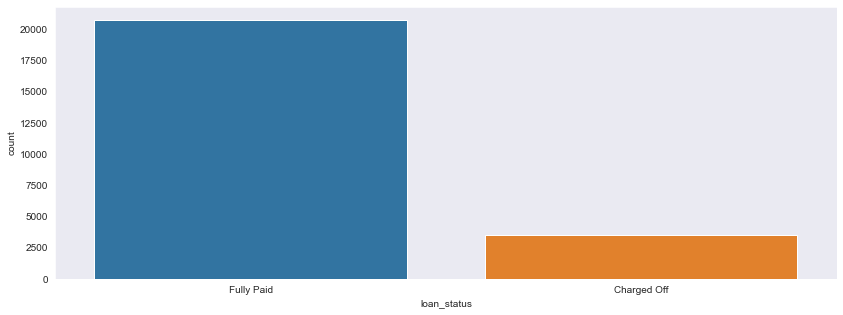

In [464]:
# check for defaults in the data 
plt.figure(figsize=(14,5))
sns.countplot(x ="loan_status", data=Loan)
plt.show()

###  To check if Home ownership affects the loan status of a person

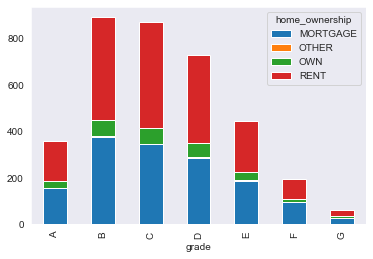

In [466]:
Loan2 = Loan[Loan['loan_status']=='Charged Off']

Loan2.groupby('grade')['home_ownership'].value_counts().unstack().plot(kind='bar',stacked=True)

#### From above plot we can see that the default rate for people staying in Rent & having mortgage is high compared to people who have own houses. From this we can say that Home ownership can be used as decision variable

### To check default rate wrt grade


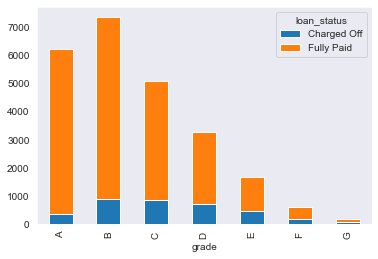

In [467]:
Loan.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)

<Figure size 1008x360 with 0 Axes>

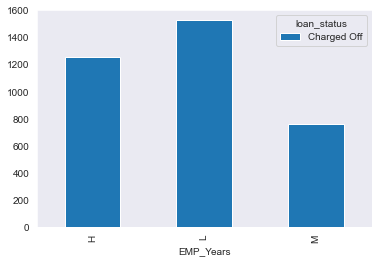

In [468]:
## Categorizing the emp_length column as Low, Med & High

Loan['EMP_Years'] = Loan['emp_length'].map(lambda x: Category[x][0])

Loan3 = Loan[Loan['loan_status'] == "Charged Off"]
Category = {0.5:("Low"),1: ("Low"),2: ("Low"),3: ("Low"),4: ("Med"),5: ("Med"),6: ("Med"),7: ("High"),8: ("High"),9: ("High"),10: ("High")}
plt.figure(figsize=(14,5))

Loan3.groupby('EMP_Years')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)

#sns.barplot(x ="EMP_Years", y='loan_amnt', data=Loan3)
#plt.show()

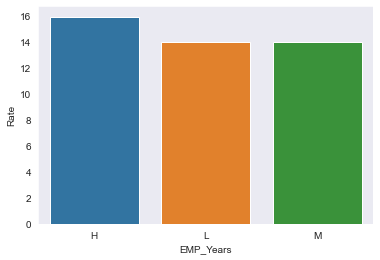

In [469]:
x = Loan.groupby(['EMP_Years'])['loan_status'].count()
x = x.reset_index()
y = Loan3.groupby(['EMP_Years'])['loan_status'].count()
y = y.reset_index()
main = pd.merge(x,y, on=['EMP_Years'])
main['Rate'] = round((main['loan_status_y'] / main['loan_status_x'])*100,2)
main


sns.barplot(x ="EMP_Years", y='Rate', data=main)
plt.show()

#### From the above chart we can say that

### Correlation between various data points

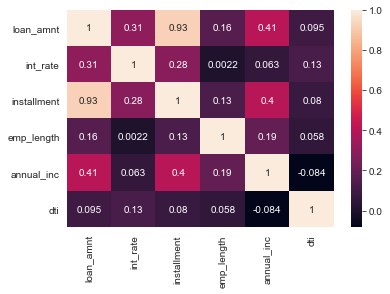

In [470]:
res = Loan.corr()

##Plot a heat map
sns.heatmap(res, annot=True)


#### Based on above chart, the DTI is negatively correlated to annual_inc and loan_amnt is highly correlated to installment


###  Loan status wrt interest rate

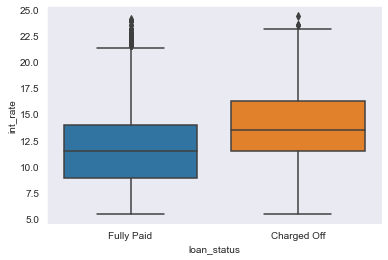

In [471]:
sns.boxplot(x="loan_status", y ="int_rate",data=Loan)

#### int_rate is  high where the loan is defaulted 

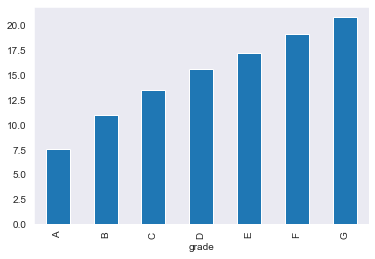

In [472]:
Loan.groupby(['grade'])['int_rate'].median().plot(kind='bar')